In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [67]:
df = pd.read_csv('./anomaly_detection_dataset_2022/trainset.csv')
df['created_at'] = pd.to_datetime(df['created_at'])

In [68]:
df.describe()

,Air1_0013A20041A77E1F/dust,Air1_0013A20041A77E1F/humid,Air1_0013A20041A77E1F/temp,Air2_0013A20041C54517/dust,Air2_0013A20041C54517/humid,Air2_0013A20041C54517/temp,Air3_0013A20041C53D79/humid,Air3_0013A20041C53D79/temp,CO2Sensor2_0013A20041C37EB3/CO2,CO2Sensor3_0013A20041C53D7D/CO2,Move1_0013A20041C53D71/movement_value,Sound1_0013A20041C53DE3/brightness,Sound1_0013A20041C53DE3/sound,Sound2_0013A20041C53CC2/brightness,Sound2_0013A20041C53CC2/sound,Sound3_0013A20041C53DA3/brightness,Sound3_0013A20041C53DA3/sound,human_detector_D8C0A69B3239/human_num
count,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000,45395.000000
mean,19.641337,44.944961,26.127437,21.056724,47.048419,24.384437,46.613988,24.402875,637.172431,428.972023,0.045534,276.699725,172.853530,267.460932,177.072695,242.608492,321.229519,0.178852
std,19.611956,6.646813,0.684787,18.669697,4.002673,1.997262,4.228365,1.831831,170.224985,71.173000,0.208474,357.800801,58.434329,253.474288,68.779549,285.756707,42.083294,0.383233
min,0.000000,34.000000,24.000000,0.000000,37.000000,22.000000,37.000000,22.000000,403.000000,401.500000,0.000000,0.000000,102.000000,49.000000,108.000000,17.000000,220.000000,0.000000
25%,6.000000,40.000000,26.000000,7.500000,44.000000,23.000000,43.500000,23.000000,526.000000,408.500000,0.000000,16.000000,144.000000,74.000000,141.000000,27.000000,293.000000,0.000000
50%,12.500000,44.000000,26.000000,15.500000,47.000000,24.000000,46.000000,24.000000,598.000000,410.000000,0.000000,28.000000,158.000000,131.500000,154.000000,69.000000,314.000000,0.000000
75%,25.000000,48.500000,26.500000,28.500000,49.000000,25.000000,49.000000,25.000000,704.000000,411.000000,0.000000,764.500000,175.000000,444.000000,176.000000,506.500000,339.000000,0.000000
max,108.500000,66.000000,29.000000,203.000000,61.000000,30.000000,62.000000,30.000000,1608.000000,1168.500000,1.000000,808.500000,721.000000,726.000000,771.000000,745.500000,766.000000,1.000000


In [69]:
df.columns.tolist()

['created_at',
 'Air1_0013A20041A77E1F/dust',
 'Air1_0013A20041A77E1F/humid',
 'Air1_0013A20041A77E1F/temp',
 'Air2_0013A20041C54517/dust',
 'Air2_0013A20041C54517/humid',
 'Air2_0013A20041C54517/temp',
 'Air3_0013A20041C53D79/humid',
 'Air3_0013A20041C53D79/temp',
 'CO2Sensor2_0013A20041C37EB3/CO2',
 'CO2Sensor3_0013A20041C53D7D/CO2',
 'Move1_0013A20041C53D71/movement_value',
 'Sound1_0013A20041C53DE3/brightness',
 'Sound1_0013A20041C53DE3/sound',
 'Sound2_0013A20041C53CC2/brightness',
 'Sound2_0013A20041C53CC2/sound',
 'Sound3_0013A20041C53DA3/brightness',
 'Sound3_0013A20041C53DA3/sound',
 'human_detector_D8C0A69B3239/human_num']

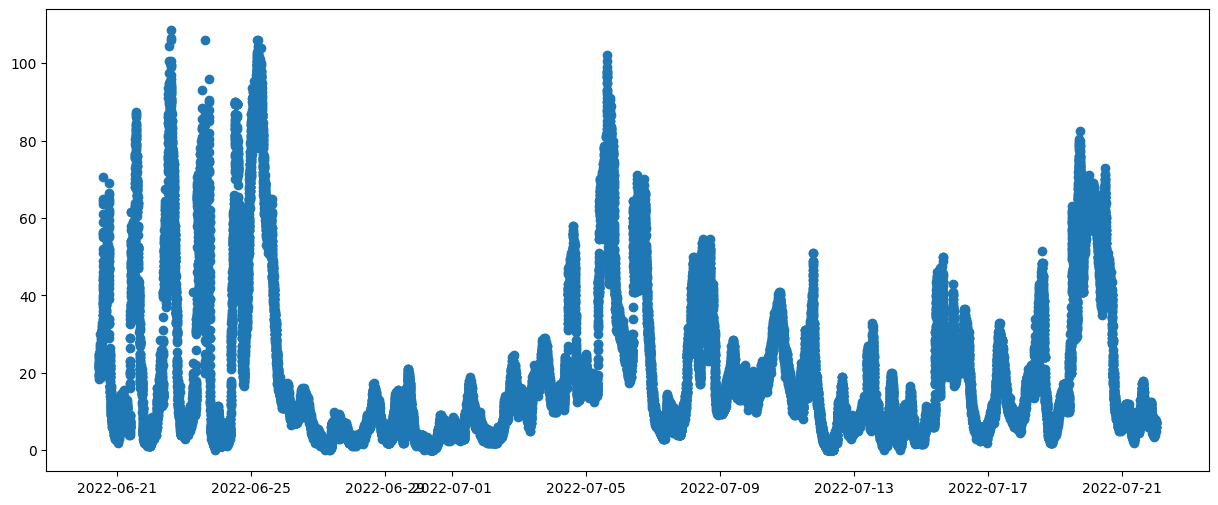

In [70]:
# plot something
plt.figure(figsize=(15, 6))
plt.scatter(df['created_at'], df['Air1_0013A20041A77E1F/dust'])
plt.show()

In [71]:
df = df.drop(columns=['human_detector_D8C0A69B3239/human_num', 'Sound1_0013A20041C53DE3/brightness'])

In [72]:
df_pca = df.drop(columns=['created_at'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

In [73]:
df_scaled[:, 3]

array([-0.3779816 , -0.32441828, -0.43154492, ..., -0.75292486,
       -0.69936154, -0.75292486])

In [74]:
df_pca.shape

(45395, 16)

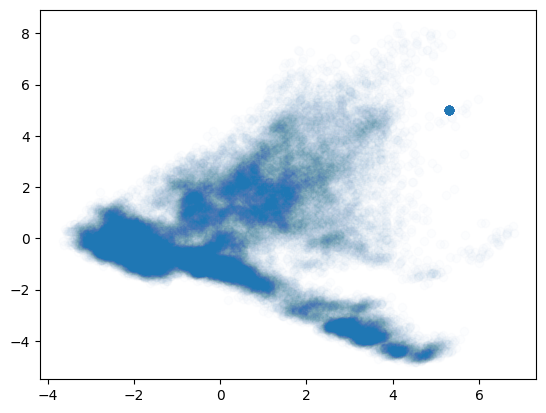

In [75]:
# PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(df_scaled)


plt.scatter(pcs[:, 0], pcs[:, 1], alpha=0.01)
plt.show()